Epoch 1/50


/Users/dineshbisht/masterdegree/myproject_env/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 780us/step - accuracy: 0.8940 - loss: 0.3509 - val_accuracy: 0.9469 - val_loss: 0.1677
Epoch 2/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.9611 - loss: 0.1317 - val_accuracy: 0.9633 - val_loss: 0.1186
Epoch 3/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.9726 - loss: 0.0925 - val_accuracy: 0.9693 - val_loss: 0.1060
Epoch 4/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.9782 - loss: 0.0711 - val_accuracy: 0.9664 - val_loss: 0.1208
Epoch 5/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - accuracy: 0.9830 - loss: 0.0562 - val_accuracy: 0.9735 - val_loss: 0.0852
Epoch 6/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.9856 - loss: 0.0463 - val_accuracy: 0.9739 - val_loss: 0.0873
Epoch 7/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.9882 - loss: 0.0383 - val_accuracy: 0.9752 - val_loss: 0.0905
Epoch 8/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - accuracy: 0.9894 - loss: 0.0342 - val_accurac

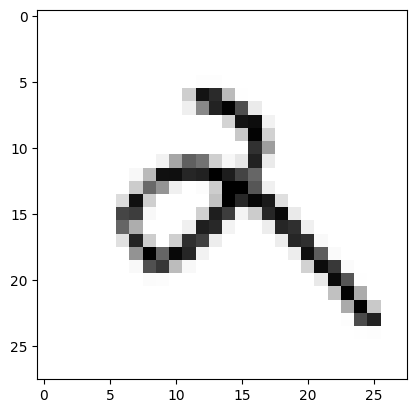

151


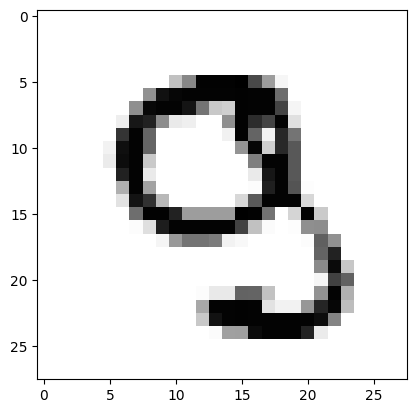

217


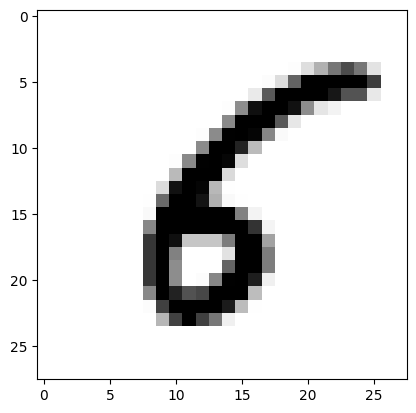

247


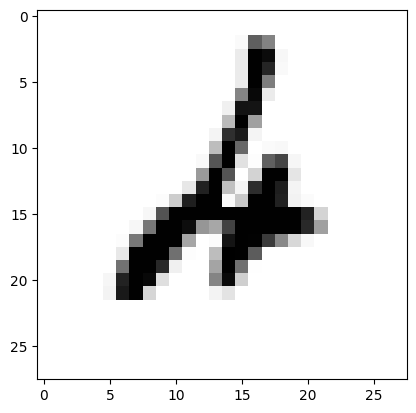

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Load the MNIST dataset and split it into train and test datasets
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# # Display the first test image in grayscale
# plt.imshow(X_test[0], cmap="Greys")

# # Print the shapes of the train and test datasets
# print(X_train.shape, X_test.shape) # (60000, 28, 28) (10000, 28, 28)

# Flatten the train and test images to (60000, 784) and normalize pixel values to the range [0, 1]
X_train_flat = X_train.reshape(60000, 784)/255
X_test_flat = X_test.reshape(10000, 784)/255

# Convert train and test labels to one-hot encoded NumPy arrays
y_train_OH = pd.get_dummies(y_train).to_numpy()
y_test_OH =  pd.get_dummies(y_test).to_numpy()

# Create, compile and train the model on the train dataset
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(X_train_flat.shape[1],)),
    tf.keras.layers.Dense(50, activation='relu',),
    tf.keras.layers.Dense(30, activation='relu',),
    tf.keras.layers.Dense(y_train_OH.shape[1], activation='softmax')
])

model.compile(
    tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(
    X_train_flat, y_train_OH, 
    validation_data=(X_test_flat, y_test_OH), 
    epochs=50, batch_size=100,
    # verbose=0
)

# Generate predictions for train and test datasets by selecting the index of the highest predicted probability
nn_model_prediction_train = np.argmax(model.predict(X_train_flat), axis=1)
nn_model_prediction_test = np.argmax(model.predict(X_test_flat), axis=1)

# Evaluate and display model accuracy with Accuracy score for train and test datasets
print(f"\nAccuracy Score in train dataset using Neural Network Model: {accuracy_score(y_train, nn_model_prediction_train):.3f}")
print(f"Accuracy Score in test dataset using Neural Network Model: {accuracy_score(y_test, nn_model_prediction_test):.3f}\n")

# Identify misclassified test samples and display the first four incorrect predictions
wrong_predictions = []
for i in range(0, len(y_test)):
    if nn_model_prediction_test[i] != y_test[i]:
        wrong_predictions.append(i)

for i in range(0, 4):
    print(wrong_predictions[i])
    plt.imshow(X_test[wrong_predictions[i]], cmap="Greys")
    plt.show()
